In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

In [2]:
df=pd.read_csv('rus-uk.csv',usecols=['location','following','followers', 'totaltweets','tweetid','tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language','favorite_count'])
df

,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0
1,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0
2,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1
3,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2
4,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0
...,...,...,...,...,...,...,...,...,...,...,...
47989,🇺🇦,237,157,51,1560778594703577090,2022-08-19 23:59:49,2,"Everything as usual, just another russian gove...","[{'text': 'RussiaIsATerroristState', 'indices'...",en,4
47990,Львів/ Сєвєродонецьк,687,488,23608,1560778614169288705,2022-08-19 23:59:54,0,@dosnostalgic twisted firestarter!,[],en,2
47991,Santiago de Chile,71965,553230,226276,1560778618208342016,2022-08-19 23:59:55,0,La ruleta Ep. 7: #Ucrania: Presidente Zelensky...,"[{'text': 'Ucrania', 'indices': [17, 25]}]",es,0
47992,"Puebla, México",461,1109,30631,1560778619428999168,2022-08-19 23:59:55,0,La ruleta Ep. 7: #Ucrania: Presidente Zelensky...,"[{'text': 'Ucrania', 'indices': [17, 25]}]",es,0


In [3]:
df.shape

(47994, 11)

In [4]:
df.columns

Index(['location', 'following', 'followers', 'totaltweets', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'favorite_count'],
      dtype='object')

In [5]:
df.rename(columns={'text':'tweet'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47994 entries, 0 to 47993
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   location        31703 non-null  object
 1   following       47994 non-null  int64 
 2   followers       47994 non-null  int64 
 3   totaltweets     47994 non-null  int64 
 4   tweetid         47994 non-null  int64 
 5   tweetcreatedts  47994 non-null  object
 6   retweetcount    47994 non-null  int64 
 7   tweet           47994 non-null  object
 8   hashtags        47994 non-null  object
 9   language        47994 non-null  object
 10  favorite_count  47994 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.0+ MB


In [7]:
df.describe()

,following,followers,totaltweets,tweetid,retweetcount,favorite_count
count,47994.000000,4.799400e+04,4.799400e+04,4.799400e+04,47994.000000,47994.000000
mean,1530.501375,3.010692e+04,7.026632e+04,1.560614e+18,1.442243,7.091532
std,5144.047245,4.226732e+05,2.368187e+05,8.940039e+13,13.492908,87.397834
min,0.000000,0.000000e+00,1.000000e+00,1.560416e+18,0.000000,0.000000
25%,69.000000,9.600000e+01,2.105000e+03,1.560547e+18,0.000000,0.000000
50%,339.000000,4.300000e+02,9.820000e+03,1.560619e+18,0.000000,0.000000
75%,1181.000000,2.236750e+03,4.717600e+04,1.560687e+18,0.000000,2.000000
max,237181.000000,1.829419e+07,4.114435e+06,1.560779e+18,978.000000,7987.000000


In [8]:
df.isnull().sum()

location          16291
following             0
followers             0
totaltweets           0
tweetid               0
tweetcreatedts        0
retweetcount          0
tweet                 0
hashtags              0
language              0
favorite_count        0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df=df.reset_index(drop=True)
df

,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count
0,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,"[{'text': 'Pfizer', 'indices': [189, 196]}, {'...",en,0
1,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,#Mundo \n\nAl menos 6 muertos y 16 heridos en ...,"[{'text': 'Mundo', 'indices': [0, 6]}, {'text'...",es,0
2,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...","[{'text': 'Ukraine', 'indices': [189, 197]}, {...",en,1
3,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...","[{'text': 'Ukraine', 'indices': [194, 202]}, {...",en,2
4,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que #Rusia sigue en pie en l...","[{'text': 'Rusia', 'indices': [22, 28]}, {'tex...",es,0
...,...,...,...,...,...,...,...,...,...,...,...
31698,🇺🇦,237,157,51,1560778594703577090,2022-08-19 23:59:49,2,"Everything as usual, just another russian gove...","[{'text': 'RussiaIsATerroristState', 'indices'...",en,4
31699,Львів/ Сєвєродонецьк,687,488,23608,1560778614169288705,2022-08-19 23:59:54,0,@dosnostalgic twisted firestarter!,[],en,2
31700,Santiago de Chile,71965,553230,226276,1560778618208342016,2022-08-19 23:59:55,0,La ruleta Ep. 7: #Ucrania: Presidente Zelensky...,"[{'text': 'Ucrania', 'indices': [17, 25]}]",es,0
31701,"Puebla, México",461,1109,30631,1560778619428999168,2022-08-19 23:59:55,0,La ruleta Ep. 7: #Ucrania: Presidente Zelensky...,"[{'text': 'Ucrania', 'indices': [17, 25]}]",es,0


In [11]:
df.isnull().sum()

location          0
following         0
followers         0
totaltweets       0
tweetid           0
tweetcreatedts    0
retweetcount      0
tweet             0
hashtags          0
language          0
favorite_count    0
dtype: int64

In [12]:
top_lang=df['language'].value_counts().iloc[0:10]
top_lang

en     15696
und     3507
de      2764
uk      2603
fr      1399
es      1221
ru      1183
it      1001
ja       336
tr       233
Name: language, dtype: int64

Text(0.5, 1.0, 'Top 10 language occurrences in tweets')

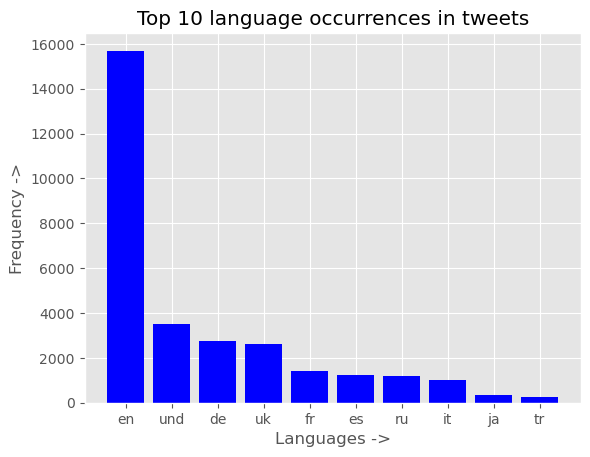

In [13]:
#plot bar graph
plt.bar(top_lang.index,top_lang.values,color='blue')
plt.xlabel('Languages ->')
plt.ylabel('Frequency ->')
plt.title('Top 10 language occurrences in tweets')

In [14]:
df['location'].value_counts().sort_values(ascending=False)

Ukraine                           1233
Україна                            946
Украина                            517
United States                      378
Bay Area, CA                       312
                                  ... 
Switzerland - Andalucía España       1
Amsterdam, the Netherlands           1
Paris  Belleville                    1
Decatur, TN 🇺🇸                       1
Orange County , CA.                  1
Name: location, Length: 7134, dtype: int64

In [15]:
top_loc=df['location'].value_counts().iloc[0:25]
top_loc

Ukraine                1233
Україна                 946
Украина                 517
United States           378
Bay Area, CA            312
India                   282
Kyiv, Ukraine           275
Київ                    228
France                  228
Germany                 218
London, England         216
Kyiv                    213
Хай живе Україна        195
Deutschland             192
Colorado, USA           192
Planet Earth            188
Earth                   178
Italia                  178
USA                     177
Berlin                  174
London                  167
Washington, DC          160
Internet                143
Europe                  142
Berlin, Deutschland     142
Name: location, dtype: int64

Text(0.5, 1.0, 'Top 20 country with most tweets')

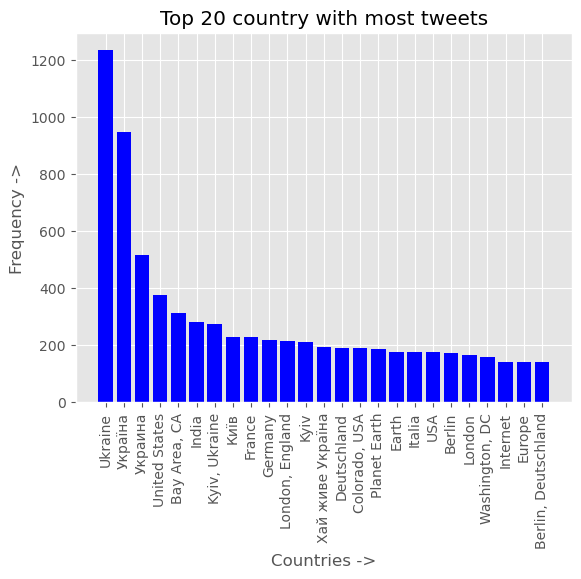

In [16]:
#plot bar graph
plt.bar(top_loc.index,top_loc.values,color='blue',)
plt.xlabel('Countries ->')
plt.xticks(rotation=90)
plt.ylabel('Frequency ->')
plt.title('Top 20 country with most tweets')

In [17]:
df['hashtags'][0]

"[{'text': 'Pfizer', 'indices': [189, 196]}, {'text': 'AstraZeneca', 'indices': [197, 209]}, {'text': 'Moderna', 'indices': [210, 218]}, {'text': 'NWO', 'indices': [219, 223]}, {'text': 'Agenda2030', 'indices': [224, 235]}, {'text': 'COP27', 'indices': [236, 242]}, {'text': 'Biden', 'indices': [243, 249]}, {'text': 'Obama', 'indices': [250, 256]}, {'text': 'Trudeau', 'indices': [257, 265]}, {'text': 'Jacinda', 'indices': [266, 274]}, {'text': 'life', 'indices': [275, 280]}]"

In [18]:
df['hashtags']=df['hashtags'].str.split(':').str[1]

In [19]:
df['hashtags']=df['hashtags'].str.split(',').str[0]

In [20]:
df['hashtags']

0                          'Pfizer'
1                           'Mundo'
2                         'Ukraine'
3                         'Ukraine'
4                           'Rusia'
                    ...            
31698     'RussiaIsATerroristState'
31699                           NaN
31700                     'Ucrania'
31701                     'Ucrania'
31702                       'Biden'
Name: hashtags, Length: 31703, dtype: object

In [21]:
top_hash=df['hashtags'].value_counts().iloc[1:6]
top_hash

 'Russia'                     1228
 'RussiaIsATerroristState'     905
 'Putin'                       868
 'China'                       786
 'StandWithUkraine'            751
Name: hashtags, dtype: int64

Text(0.5, 1.0, 'Top 5 hashtags occurences')

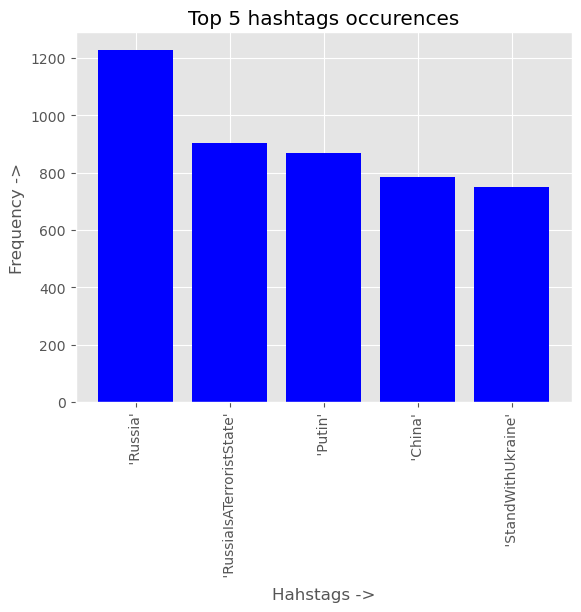

In [22]:
#plot bar graph
plt.bar(top_hash.index.str.split(',').str[0],top_hash.values,color='blue',)
plt.xlabel('Hahstags ->')
plt.xticks(rotation=90)
plt.ylabel('Frequency ->')
plt.title('Top 5 hashtags occurences')

In [23]:
df['tweet'][0]

'Dear vaccine advocate\n\nDo take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.\n\nRegards\n#Pfizer #AstraZeneca #Moderna #NWO #Agenda2030 #COP27 #Biden #Obama #Trudeau #Jacinda #life https://t.co/VTbfuqiDvu'

In [24]:
df['tweet']=df['tweet'].str.split('http').str[0]

In [25]:
df['tweet']=df['tweet'].str.split('#').str[0]

In [26]:
df['tweet'][0]

'Dear vaccine advocate\n\nDo take the COVID19 mRNA shot and boosters, but do know that @OurWorldInData data shows it offers zero protection, actually accelerates death of vaccinated.\n\nRegards\n'

In [27]:
text=[]
for i in range(len(df)):
    t=re.sub('[^a-zA-Z]',' ',df['tweet'][i])
    t=t.lower()
    t=t.split()
    t=[lemmatizer.lemmatize(word) for word in t if not word in set(stopwords.words('english'))]
    t=' '.join(t)
    text.append(t)

In [28]:
text

['dear vaccine advocate take covid mrna shot booster know ourworldindata data show offer zero protection actually accelerates death vaccinated regard',
 '',
 'animal shelter dog cat need help raising fund food animal paypal dogandcat helper gmail com',
 'welcome shelter located ukraine kyiv shelter need help raising fund food animal paypal dogandcat helper gmail com',
 'tensi n debido que',
 'opinion ukraine war also fought language cnn',
 'art culo de',
 'today crude oil price wti brent pm est',
 'rain delay problem pound pound best',
 '',
 'olena osadcha organization know teamed novaukraine ensure one impacted demographic ukraine getting help support need read',
 'medrinkwine',
 'la puesta en marcha de la iniciativa del mar negro para la exportaci n de grano un acuerdo entre rusia',
 'kremlin handle referendum temporarily occupied territory ukraine russian medium ukrainska pravda',
 'soaking smoke russian tourist flee crimea russian invasion ukraine',
 '',
 'rbreich day country make 

In [29]:
df1=pd.DataFrame(text,columns=['text'])
df1

,text
0,dear vaccine advocate take covid mrna shot boo...
1,
2,animal shelter dog cat need help raising fund ...
3,welcome shelter located ukraine kyiv shelter n...
4,tensi n debido que
...,...
31698,everything usual another russian government pe...
31699,dosnostalgic twisted firestarter
31700,la ruleta ep
31701,la ruleta ep


In [30]:
df1['text']=df1['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [31]:
df=pd.concat([df1,df],axis=1)
df.head()

,text,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count
0,dear vaccine advocate take covid mrna shot boo...,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,'Pfizer',en,0
1,,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,,'Mundo',es,0
2,animal shelter need help raising fund food ani...,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...",'Ukraine',en,1
3,welcome shelter located ukraine kyiv shelter n...,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...",'Ukraine',en,2
4,tensi debido,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que",'Rusia',es,0


In [32]:
df.isnull().sum()

text                 0
location             0
following            0
followers            0
totaltweets          0
tweetid              0
tweetcreatedts       0
retweetcount         0
tweet                0
hashtags          3475
language             0
favorite_count       0
dtype: int64

In [33]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [34]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [35]:
df['subjectivity']=df['text'].apply(subjectivity)
df['polarity']=df['text'].apply(polarity)
df.head()

,text,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count,subjectivity,polarity
0,dear vaccine advocate take covid mrna shot boo...,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,'Pfizer',en,0,0.1,0.0
1,,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,,'Mundo',es,0,0.0,0.0
2,animal shelter need help raising fund food ani...,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...",'Ukraine',en,1,0.0,0.0
3,welcome shelter located ukraine kyiv shelter n...,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...",'Ukraine',en,2,0.9,0.8
4,tensi debido,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que",'Rusia',es,0,0.0,0.0


(-0.5, 499.5, 299.5, -0.5)

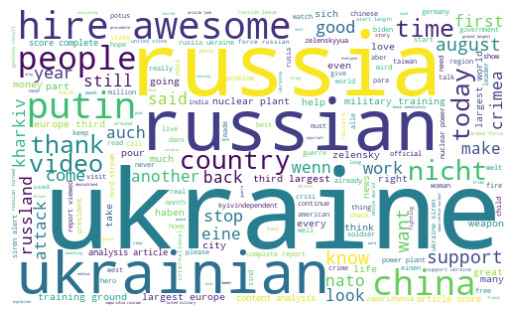

In [36]:
words=' '.join(df['text'])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=110,background_color='white').generate(words)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')

In [37]:
def get_analysis(score):
    if score <=0:
        return 'negative'
    else:
        return 'positive'
df['label']=df['polarity'].apply(get_analysis)
df.head()

,text,location,following,followers,totaltweets,tweetid,tweetcreatedts,retweetcount,tweet,hashtags,language,favorite_count,subjectivity,polarity,label
0,dear vaccine advocate take covid mrna shot boo...,Afrika Borwa,219,197,4789,1560416252937617411,2022-08-19 00:00:00,0,Dear vaccine advocate\n\nDo take the COVID19 m...,'Pfizer',en,0,0.1,0.0,negative
1,,"Puebla, México",1419,6402,70267,1560416256179707904,2022-08-19 00:00:01,0,,'Mundo',es,0,0.0,0.0,negative
2,animal shelter need help raising fund food ani...,Ukraine,782,109,1198,1560416257752666113,2022-08-19 00:00:01,0,"Animal shelter Dogs and Cats, we need your hel...",'Ukraine',en,1,0.0,0.0,negative
3,welcome shelter located ukraine kyiv shelter n...,Ukraine,5,39,690,1560416257790382081,2022-08-19 00:00:01,0,"Welcome to our shelter!\nLocated in Ukraine, K...",'Ukraine',en,2,0.9,0.8,positive
4,tensi debido,Nuevo Laredo,2269,17978,56188,1560416257937051648,2022-08-19 00:00:01,0,"Tensión, debido a que",'Rusia',es,0,0.0,0.0,negative


In [38]:
count=1
sortedDF=df.sort_values(by=['polarity'],ascending=True)
for i in range(0,df.shape[0]):
    if (sortedDF['label'][i]=='positive'):
        print(str(count) + '. ' + sortedDF['text'][i])
        count+=1

1. welcome shelter located ukraine kyiv shelter need help raising fund food animal paypal dogandcat helper gmail
2. rain delay problem pound pound best
3. rbreich country make really interesting movie country make
4. permitting encouraging strife permit loved wrong people grow richer really want shackleford author novel link
5. today good post video russian vehicle getting blown proof
6. zelenskyy secretary general agree framework possible nuclear watchdog mission zaporizhzhia nuclear power plant ukrainska pravda
7. cheltenham literature festival october great britain host series literary event including ukraine
8. nice
9. light
10. secretario general organizaci naciones unidas antonioguterres pidi partes involucradas conflicto
11. chief ukraine seek secure nuclear plant explore peace talk
12. avindman stay safe
13. president trump left office whole toad news service shut door feazelle muddyum medium pensignal
14. fitting first iceyefi satellite image
15. brave hero
16. debtcrisisorg n

1269. nexta wait russia make trade entity consider legally terrorist definitely russia state sponsor terrorism
1270. deputy head advocate commissioning controversial nord stream pipeline
1271. embukraine detail available
1272. russian military surveillance facility territory russia taken claim work ukrainian special service others loitering munition used ukraine medium
1273. sternenko mcfaul mhmck russian singer biggest supporter putin seems like lost need help finding back russia good
1274. lovely large font ukraine small world perceived know even better album published france picture beautiful place world without single photo ukraine
1275. steve stuck zerohedge normal every year target enough pipeline work whole winter catastrophe pipeline shut autumn winter russia shut pressure opening
1276. surpwear bayraktar love best explosion moskva petersburg called russian elite longer feel safe
1277. yesterday winning testimony clifford still best among rest keep good work going surely reward

3134. michael kevinr fragen rumeliobserver wird ihnen best tigen menschen nicht wegen hunger oder energieknappheit fliehen aber sollen beenden haben gasimporte nicht verboten
3135. jayinkyiv great waste left
3136. hire awesome
3137. brilliant research goal create housing supply management tool
3138. hire awesome
3139. nexta better late never guess
3140. content analysis article score complete report viewed
3141. hire awesome
3142. live right playing game come
3143. hire awesome
3144. designating russia state sponsor terrorism could endanger fragile deal allow free transit ukrainian grain ship state department warned
3145. happy medic photo received ambulance mykolaiv city prosthetics responsible safe delivery continuous shelling fire going stop city took longer usual deliver ambulance
3146. russian invader front line celebrated airborne force honor alcohol gunfire friendly fire result shot platoon commander waiting inspection shoot mind
3147. older article benjaminja managing editor rs

In [39]:
count=1
sortedDF=df.sort_values(by=['polarity'],ascending=False)
for i in range(0,df.shape[0]):
    if (sortedDF['label'][i]=='negative'):
        print(str(count) + '. ' + sortedDF['text'][i])
        count+=1

1. dear vaccine advocate take covid mrna shot booster know ourworldindata data show offer zero protection actually accelerates death vaccinated regard
2. 
3. animal shelter need help raising fund food animal paypal dogandcat helper gmail
4. tensi debido
5. opinion ukraine also fought language
6. culo
7. today crude price brent
8. 
9. olena osadcha organization know teamed novaukraine ensure impacted demographic ukraine getting help support need read
10. medrinkwine
11. puesta marcha iniciativa negro para exportaci grano acuerdo entre rusia
12. kremlin handle referendum temporarily occupied territory ukraine russian medium ukrainska pravda
13. soaking smoke russian tourist flee crimea russian invasion ukraine
14. 
15. survive
16. moment ukrainian drone drop bomb russian tank open hatch precision
17. 
18. explos altas ouvidas base belbek esta noite maior base russa crimeia russos estariam base momento explos crimeia fogo cruzado mapa ximo story
19. target archery competition info found
2

1990. crazy world
1991. 
1992. lazarchuk dima
1993. istina posledicama nato bombardovanja srbije
1994. tamerlanchik
1995. elsyobradorova lopezobrador almirantesrio luis sandoval compre armas kremlinrussia kremlinrussia cuidemos obras ponen pedo gringo kensalazar prest mosles islas
1996. anders aslund
1997. russian
1998. 
1999. 
2000. 
2001. fratotolo kasperreloaded eccola amica
2002. increasingly hard
2003. vidverta vperta
2004. 
2005. child know
2006. andriiko
2007. warga rusia dipersulit negara nato putin didesak gunakan senjata nuklir
2008. kapal perang china kepergok dekati lokasi rudal taiwan
2009. 
2010. 
2011. goodmorning
2012. dcstl actually
2013. bilateral trade
2014. 
2015. 
2016. crisis
2017. animal kingdom creature small
2018. 
2019. state dept spokesperson price going long term proposition
2020. 
2021. 
2022. 
2023. phngkhin
2024. 
2025. desintegraci yugoslavia promovida activamente eeuu mucho dolor pobreza muerte hubiese provocado reforma desde dentro auspiciada gorbachov

5578. criminal case initiated article high treason
5579. 
5580. security service
5581. 
5582. 
5583. lasciano sempre estasiato commosso dalla bellezza creato queste aurore boreali visibili dalla crimea spettacolo della natura nella forma sublime
5584. 
5585. 
5586. 
5587. armed force
5588. 
5589. 
5590. konstantinkuhle wenn
5591. 
5592. russia threatens stop europe largest
5593. daily update enemy loss
5594. ukrainian side insist voluntary dismantling military facility crimea happen mean used
5595. everyone lying doctor describes shocking corruption
5596. 
5597. 
5598. 
5599. 
5600. serhiyprytula pryvatmemarnya
5601. 
5602. 
5603. tiens
5604. diretta
5605. 
5606. daest aovest jacopo iacoboni servo
5607. marcusfaber treffer versenkt unterbindet ukraine wirksam nachschub herbst winter hjahr dann ssen auch russische verb sich ergeben gesichtsverlust russland
5608. 
5609. 
5610. soldaten verweigern ihren dienst weil kollegen hrend ihrer erholung belgorod dchen vergewaltigt haben eine eine 

7980. ukraine vergleicht forderungen bestimmten lagern
7981. mvitrovska
7982. finch sparano loro bene
7983. 
7984. schreiber kugel alinalipp auch illegal
7985. united nation secretary
7986. winner
7987. dans cimeti
7988. 
7989. august olafscholz manuelaschwesig sitzen zusammen beim kaffee schwelgen erinnerungen zeit ampelkoalition nach minuten gespr vorbei denn seltsamerweise haben beide eklatante erinnerungsl cken
7990. progjester
7991. 
7992. 
7993. russianembassy
7994. argument
7995. 
7996. lock cheating evil lying dangerous crook
7997. 
7998. shocking russian military grade robot proven fake rocket launcher mounted ninja robot star russia army trade show
7999. germany waste space never pull weight kick nato finland sweden reliable partner along poland fact ukraine military superpower
8000. 
8001. 
8002. imaginary
8003. 
8004. russianembassy
8005. erdo ukrayna nemli klamalar
8006. chemodanov
8007. 
8008. lviv resident zelenskyyua
8009. russian demanded mercenary excecated soon court

11823. candidate sunak russia putin barred
11824. honigretter apfelretter nussretter sind ostslawische feste rund fastenzeit maria entschlafen heute apfelretter ukrainische kultur jetzt lesen
11825. horsynox klarden
11826. 
11827. pfmajorino anche sinistra italiana distinti riferimenti internazionali
11828. tokayev arrived sochi working visit hold bilateral meeting russian president vladimir
11829. 
11830. sonofobiwan
11831. 
11832. welt ohne wird
11833. 
11834. 
11835. immer dieselbe leier wenn waffenlieferungen geht antr industrie bitten
11836. 
11837. juliadavisnews
11838. arca oscar sirekt wurden auch viele ukrainische chtlinge ihren haustieren versorgt hilfsg
11839. doctor stay ukraine town people need
11840. lhoesle dimostrami solo immagine dove vede cocaina solo povera disagiata diffamatrice servizio criminale invasore assassino trascorri delle belle vacanze paradiso ruzzo
11841. welt sich inflation aufgrund kriegs ukraine weiter entwickelt schwer abzusehen schade welt etwas ung

14664. commission jhahneu echo zaporizhia russian turned military training ground largest europe third largest world need force russian leave immediately
14665. mundo
14666. 
14667. 
14668. july total
14669. 
14670. 
14671. could central asian stan state turn away
14672. berdyansk tatyana
14673. juliadavisnews putin kremlin moscow really desperate liers mind killing murdering threatening
14674. danny nerdnik loffredojeremy probably faith anonymous official quoted real fact based news people talk show host journalist find repeat another news network give hard question
14675. 
14676. 
14677. 
14678. actually
14679. jhahneu zaporizhia russian turned military training ground largest europe third largest world need force russian leave immediately
14680. holmstromeva juliadavisnews ukraine well
14681. 
14682. licopt russe
14683. 
14684. 
14685. erdogan siap bantu akhiri perang rusia ukraina melalui diplomasi
14686. herr bundeskanzler
14687. 
14688. gabrielmariya commission unhumanrightseu eu

17287. 
17288. result
17289. 
17290. ucrania kiev
17291. check greeting card uploaded
17292. 
17293. 
17294. mhmck read prevailing wind region
17295. frialum
17296. 
17297. writerrjwright malcolmnance jmvasquez malcolmnance frontlines
17298. yeah mention
17299. thing need know
17300. tpirozhochek
17301. zaporizhzhia zelensky mondo sull orlo disastro nucleare
17302. reading stupidity european american journalist capable writing zaporizhzhia already ridiculous
17303. gregabbott
17304. russian soldier tell mother worried ukraine intends counter attack according intelligence intercepted phone call
17305. 
17306. 
17307. nexta fucking loser sucker
17308. villanelle
17309. 
17310. onlineclass help
17311. time
17312. awful image kharkiv
17313. check weekender tote uploaded
17314. another look tornado touched
17315. frialum
17316. guterres odessa havn understreket viktigheten kornavtalen undertegnet istanbul
17317. 
17318. 
17319. check shirt uploaded
17320. aqxwiii
17321. guterres odessa port

19249. 
19250. 
19251. tweet remind
19252. 
19253. 
19254. europarl europarl europarl europarl europarl europarl give weapon
19255. hire
19256. video said related explosion russian military airport sevastopol crimea
19257. 
19258. omverond bskbarry joshnbcnews nbcnews
19259. massage service
19260. iris blue
19261. katya tabasco
19262. tomorrow night anthonyjoshua usykaa
19263. deptofdefense usairforce
19264. belgorod crimea report arrival nova kakhovka
19265. 
19266. cometwtf lovewinter
19267. iceye
19268. russland kasakhstan forbereder felles velser
19269. 
19270. retenir rencontre entre erdogan zelensky guterres analyse ancien rapporteur
19271. state solution ukraine john mearsheimer
19272. andaletomabefis enricoletta stai proponendo articolo maggio subito dopo invasione della
19273. expreso
19274. send send marder
19275. 
19276. 
19277. thank usarmy usairforce usnavy usmc troop fight united state america please send troop help
19278. heinoholstein
19279. russia ordered worker zapori

22658. 
22659. united state fulfilled issue giving taiwan
22660. 
22661. 
22662. smmurf
22663. 
22664. 
22665. 
22666. questi ballano ridono umbriaghano intanto rischia terza guerra mondiale
22667. evangeliondeath marytsymbaliuk
22668. 
22669. monde french pres tell french accept price freedom regard brutal attack russia ukraine
22670. 
22671. omnicentrist recording telling call look phone back drug
22672. wizz verkauf ticket zwischen dhabi moskau eingestellt
22673. ancora gente convinta
22674. nasams
22675. russia fired liking anti post police officer relative like anti post concerning russia invasion ukraine
22676. gosloto result
22677. business zeiten krieges
22678. wird langsam zeit putin klar machen einem atomaren knall auch wenn eines atomkraftwerke ukraine russland besetzt einzig aktiver kriegseintritt seiten ukraine konsequenz sein kann
22679. 
22680. meanwhile party according telegram channel managed fundraise around power bank novorossiya defender congrats
22681. buena esta c

25192. colonelbigboss quel prix libert celle amis corrompus
25193. thank denverchannel covering effort
25194. 
25195. 
25196. 
25197. 
25198. finland prime minister outraged take word zelensky throw tantrum ruin
25199. 
25200. 
25201. 
25202. 
25203. canada cash critical mineral biden climate bill news
25204. homohappyens randomize func
25205. 
25206. height conceit business usual blank gloss
25207. porichka
25208. olllli
25209. comme tous copains
25210. 
25211. last video showing
25212. gosloto result
25213. charliekirk
25214. 
25215. 
25216. 
25217. gosloto result
25218. 
25219. half
25220. fran sont surtout payer prix pour
25221. 
25222. 
25223. 
25224. 
25225. anstyiq
25226. akasugi
25227. 
25228. 
25229. lxsummer
25230. emin official video
25231. 
25232. gosloto result
25233. twitch affiliate warren unbanned warrenclayton
25234. matteosalvinimi pensi casa
25235. coffee shelf click
25236. 
25237. gustavo cscn correct like meme ukrainian portrayed aggressor little know opposite
2523

In [40]:
ptweets=df[df['label']=='positive']
per_ptweets=(ptweets.shape[0]/df.shape[0])*100
per_ptweets

12.134498312462542

In [41]:
ntweets=df[df['label']=='negative']
per_ntweets=(ntweets.shape[0]/df.shape[0])*100
per_ntweets

87.86550168753746

Text(0, 0.5, 'Count ->')

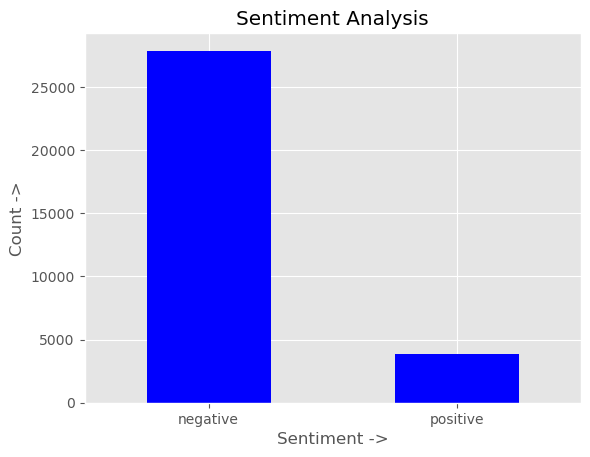

In [55]:
df['label'].value_counts().plot(kind='bar',color='b')
plt.title('Sentiment Analysis')
plt.xticks(rotation=0)
plt.xlabel('Sentiment ->')
plt.ylabel('Count ->')

In [43]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])
x=tokenizer.texts_to_sequences(df['text'])
x=pad_sequences(x,maxlen=100)

In [44]:
y=pd.get_dummies(df['label']).values

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [47]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=100),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [48]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [49]:
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2)

Epoch 1/10
318/318 [==============================] - 17s 46ms/step - loss: 0.2584 - accuracy: 0.9022 - precision: 0.9022 - recall: 0.9022 - val_loss: 0.1373 - val_accuracy: 0.9452 - val_precision: 0.9452 - val_recall: 0.9452
Epoch 2/10
318/318 [==============================] - 15s 46ms/step - loss: 0.0777 - accuracy: 0.9731 - precision: 0.9731 - recall: 0.9731 - val_loss: 0.1010 - val_accuracy: 0.9643 - val_precision: 0.9643 - val_recall: 0.9643
Epoch 3/10
318/318 [==============================] - 15s 46ms/step - loss: 0.0321 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9914 - val_loss: 0.0973 - val_accuracy: 0.9714 - val_precision: 0.9714 - val_recall: 0.9714
Epoch 4/10
318/318 [==============================] - 15s 46ms/step - loss: 0.0173 - accuracy: 0.9955 - precision: 0.9955 - recall: 0.9955 - val_loss: 0.1066 - val_accuracy: 0.9698 - val_precision: 0.9698 - val_recall: 0.9698
Epoch 5/10
318/318 [==============================] - 15s 47ms/step - loss: 0.0106 - accuracy: 0

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 328,386
Trainable params: 328,386
Non-trainable params: 0
_________________________________________________________________


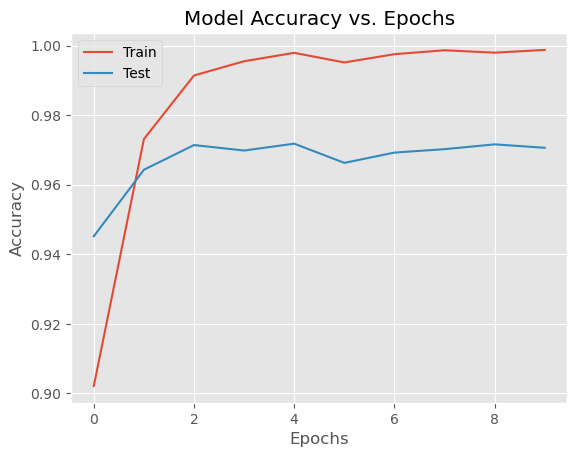

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'])

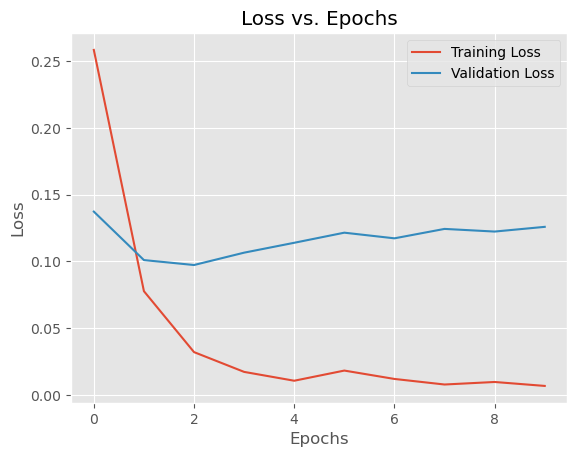

In [52]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

In [56]:
accuracy=model.evaluate(x_test,y_test)
print('\nLoss, Accuracy, Precison, Recall: ',accuracy)

199/199 [==============================] - 2s 10ms/step - loss: 0.1444 - accuracy: 0.9675 - precision: 0.9675 - recall: 0.9675

Loss, Accuracy, Precison, Recall:  [0.14439263939857483, 0.9675130248069763, 0.9675130248069763, 0.9675130248069763]
